# Linear Regression - Simple Example
### Utilizes a fake US Housing Dataset

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
#Fake data, but good for example
df = pd.read_csv('USA_Housing.csv')

In [8]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [38]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [51]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
#Removed string column Address and Price since it's in the y

In [52]:
y = df['Price']

In [53]:
#Import sklearn toolkit
from sklearn.model_selection import train_test_split

In [54]:
#Choose the test size
#Test size = % of dataset allocated for testing (.4 = 40%)
#Random state = # of random splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
#Linear Regression Obj
lm = LinearRegression()

In [57]:
#Fit
lm.fit(X_train,y_train)

LinearRegression()

In [59]:
#You can manually view coefficients before mapping to X
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [62]:
#Create list of coefficients by X columns
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [63]:
cdf

#For every 1 unit increment in Avg. Area income, there is an approx. $21 increase in price, etc.

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Predictions

In [66]:
#Now let's try the testing set
predictions = lm.predict(X_test)

In [67]:
#Predicted prices of the homes
predictions

array([1260960.70567627,  827588.75560334, 1742421.2425434 , ...,
        372191.40626923, 1365217.15140897, 1914519.5417887 ])

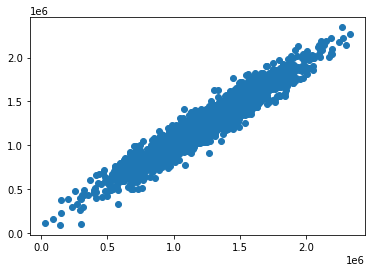

In [69]:
#Compare predicted prices of homes to actual
plt.scatter(y_test,predictions)

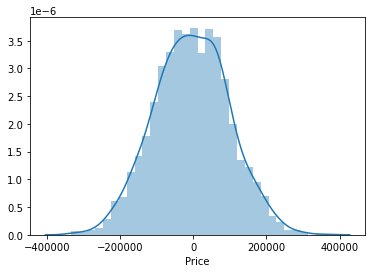

In [70]:
#Distribution of residuals
#Actual values of y_test vs. predicted
sns.distplot((y_test-predictions))
#Since it's normally distributed, this is good

In [72]:
#Import metrics
from sklearn import metrics

In [73]:
#Get the mean absolute error
metrics.mean_absolute_error(y_test, predictions)

82288.22251914948

In [74]:
#Get the mean squared error
metrics.mean_squared_error(y_test, predictions)

10460958907.209064

In [76]:
#Get the root mean squared error
#One of the better metrics, most popular
#Essentially, the closer to 0 the better, but it depends in this case the avg home price. 
#Our avg home price here is 1.2m, so this RMSE could be interpreted as good
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.8292229094

In [ ]:
#All done for now!